## All You Need is Time-Series Visualization

- https://www.kaggle.com/code/subinium/all-you-need-is-time-series-visualization-20

In [3]:

import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

pd.options.display.max_columns = 999

In [4]:
sns.color_palette(["#00798c", "#d1495b", '#edae49', '#66a182'])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274)]

In [6]:
data = pd.read_csv('data/house/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
data.shape

(1460, 81)

In [9]:
data.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### 1. Bar
Bar > Single > Vertical
바차트는 절대적인 사이즈를 비교하는데 용이하다.

In [10]:
built = data["YearBuilt"].value_counts().sort_index()

In [11]:
built.head()

1872    1
1875    1
1880    4
1882    1
1885    2
Name: YearBuilt, dtype: int64

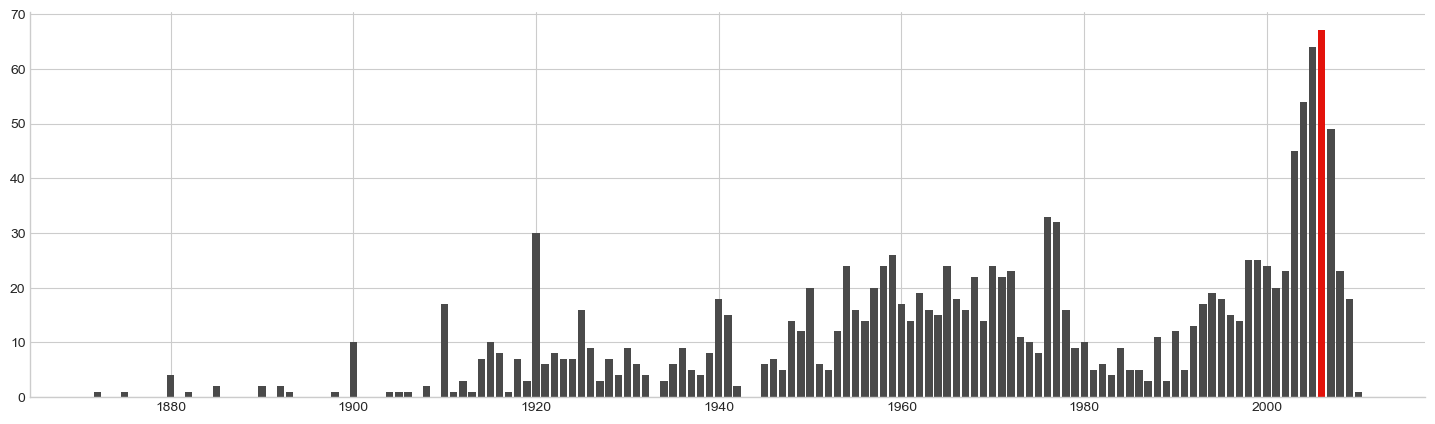

In [15]:
fig, ax = plt.subplots(figsize = (18, 5))
color = ['#4a4a4a' if val != max(built) else '#e3120b' for val in built] # 최대값만 다른 색으로
ax.bar(built.index, built, color=color)

for s in ['top', 'right']: # 탑, 오른쪽 축 표시 제거
    ax.spines[s].set_visible(False)
    
ax.grid(True)
plt.show()

Bar > Single > Horizontal

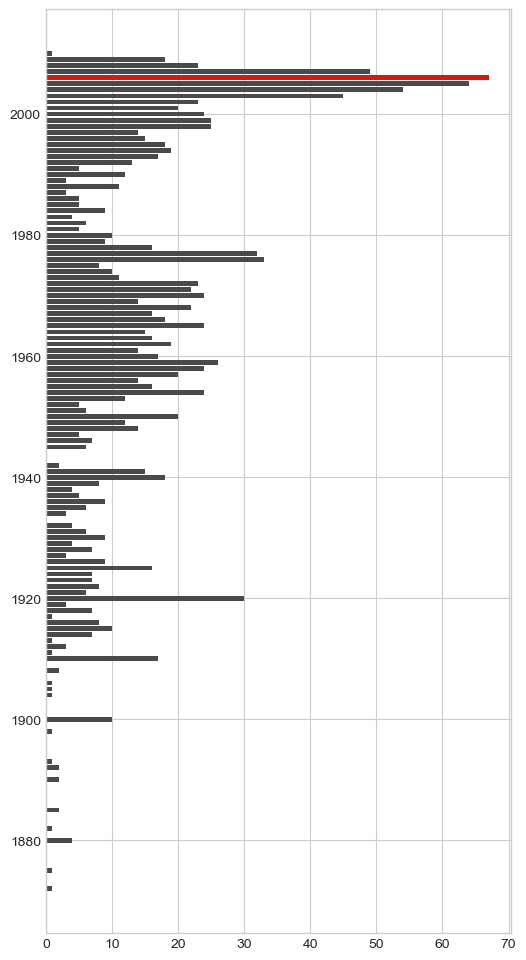

In [16]:
fig, ax = plt.subplots(figsize = (6, 12))
ax.barh(built.index, built, color = color)
ax.grid(True)

plt.show()

Bar > Multiple > Subplots

In [17]:
data["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [19]:
data["HouseStyle"] = data["HouseStyle"].apply(lambda x : 'ETC' if x in ['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'] else x)
data["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
ETC       135
Name: HouseStyle, dtype: int64

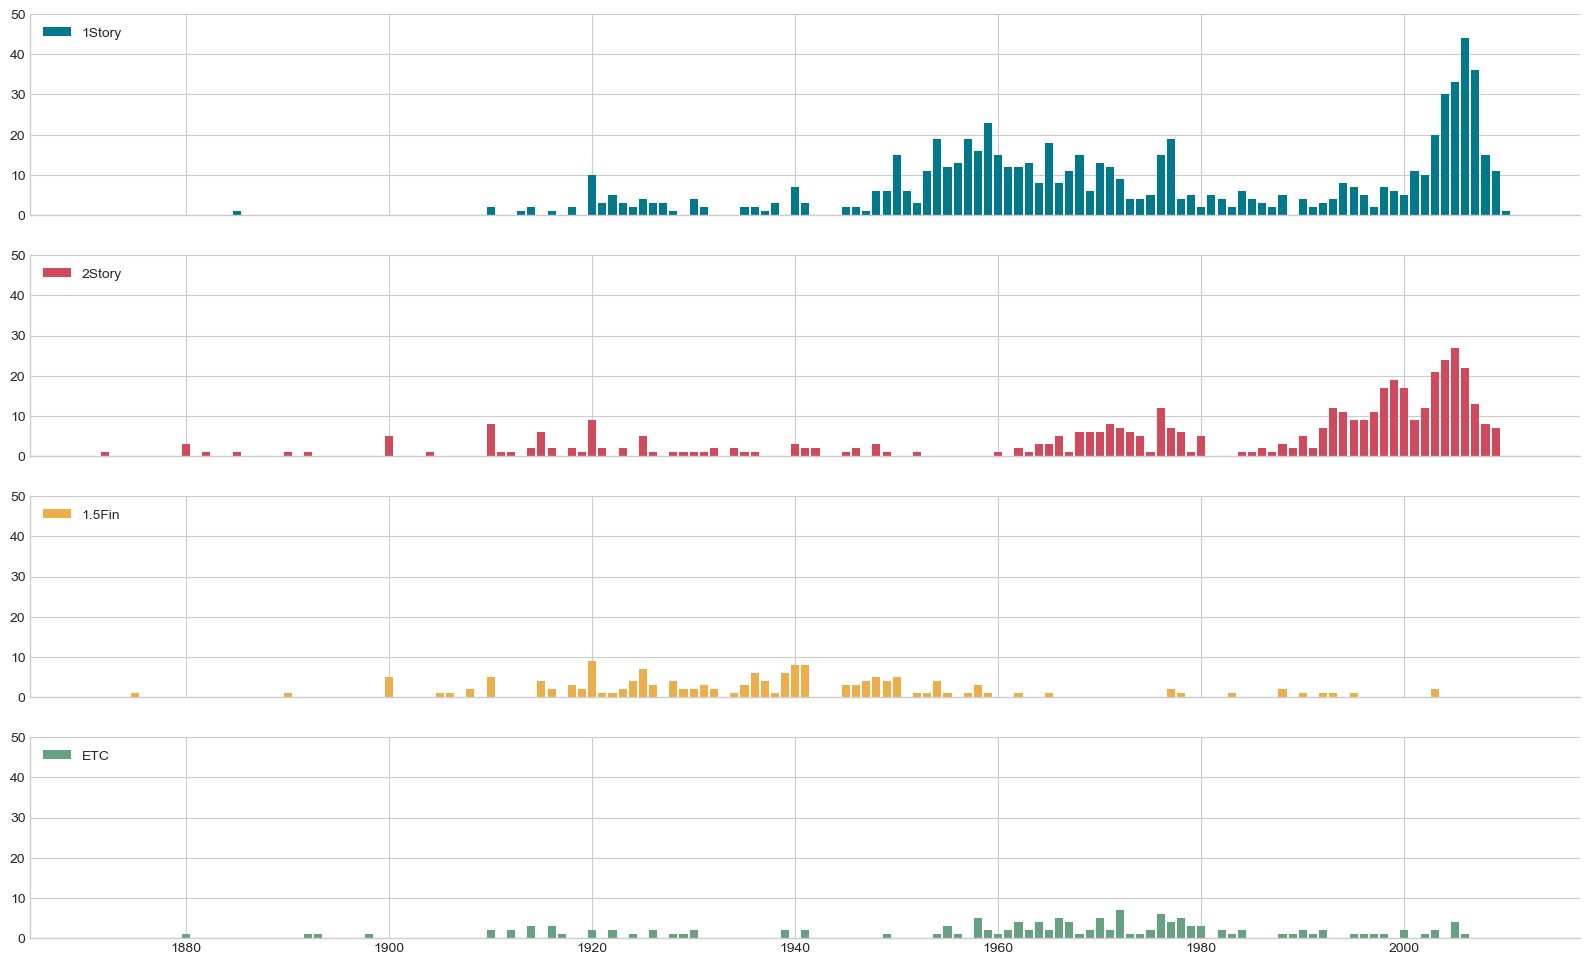

In [21]:
fig, ax = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]["YearBuilt"].value_counts()
    
    ax[i].bar(hs_built.index, hs_built, color = color[i], label= hs)
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc = 'upper left')
    for s in ['top', 'right']:
        ax[i].spines[s].set_visible(False)
        
plt.show()

Bar > Multiple > Overlaped

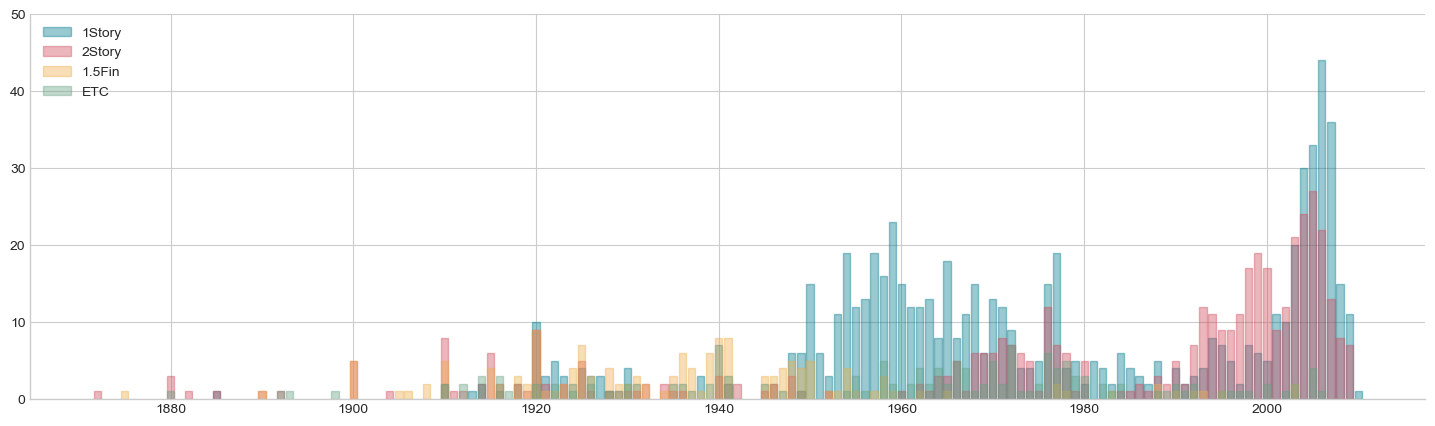

In [26]:
fig, ax = plt.subplots(figsize=(18, 5), sharex=True)
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]["YearBuilt"].value_counts()
    
    ax.bar(hs_built.index, hs_built, color = color[i], label=hs,
              alpha = 0.4, edgecolor = color[i])

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 50)
ax.legend(loc = 'upper left')
    
plt.show()

Bar > Multiple > Stacked > Amout

In [27]:
data_sub = data.groupby('HouseStyle')["YearBuilt"].value_counts().\
    unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum(axis=0) # 스태킹하기 위해 아래로 누적합

In [28]:
data_sub

YearBuilt,1872,1875,1880,1882,1885,1890,1892,1893,1898,1900,1904,1905,1906,1908,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1934,1935,1936,1937,1938,1939,1940,1941,1942,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
HouseStyle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ETC,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,5.0,2.0,1.0,2.0,4.0,2.0,4.0,2.0,5.0,4.0,1.0,2.0,5.0,2.0,7.0,1.0,1.0,2.0,6.0,4.0,5.0,3.0,3.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
1.5Fin,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,1.0,2.0,7.0,0.0,2.0,0.0,3.0,4.0,5.0,1.0,3.0,2.0,11.0,1.0,3.0,2.0,5.0,7.0,5.0,0.0,5.0,3.0,4.0,3.0,2.0,1.0,3.0,6.0,4.0,1.0,8.0,8.0,10.0,0.0,3.0,3.0,4.0,5.0,5.0,5.0,0.0,1.0,1.0,5.0,4.0,1.0,1.0,8.0,3.0,1.0,2.0,5.0,2.0,4.0,3.0,5.0,4.0,1.0,2.0,5.0,2.0,7.0,1.0,1.0,2.0,6.0,6.0,6.0,3.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
2Story,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,10.0,1.0,1.0,1.0,2.0,15.0,1.0,3.0,0.0,5.0,10.0,7.0,1.0,5.0,3.0,20.0,3.0,3.0,4.0,5.0,12.0,6.0,0.0,6.0,4.0,5.0,4.0,4.0,3.0,4.0,7.0,4.0,1.0,8.0,11.0,12.0,2.0,4.0,5.0,4.0,8.0,6.0,5.0,0.0,2.0,1.0,5.0,4.0,1.0,1.0,8.0,3.0,2.0,2.0,7.0,3.0,7.0,6.0,10.0,5.0,7.0,8.0,11.0,10.0,14.0,7.0,6.0,3.0,18.0,13.0,12.0,4.0,8.0,0.0,2.0,2.0,3.0,1.0,2.0,1.0,6.0,3.0,8.0,3.0,10.0,13.0,11.0,11.0,10.0,12.0,18.0,19.0,19.0,9.0,13.0,25.0,24.0,31.0,23.0,13.0,8.0,7.0,0.0
1Story,1.0,1.0,4.0,1.0,2.0,2.0,2.0,1.0,1.0,10.0,1.0,1.0,1.0,2.0,17.0,1.0,3.0,1.0,7.0,10.0,8.0,1.0,7.0,3.0,30.0,6.0,8.0,7.0,7.0,16.0,9.0,3.0,7.0,4.0,9.0,6.0,4.0,3.0,6.0,9.0,5.0,4.0,8.0,18.0,15.0,2.0,6.0,7.0,5.0,14.0,12.0,20.0,6.0,5.0,12.0,24.0,16.0,14.0,20.0,24.0,26.0,17.0,14.0,19.0,16.0,15.0,24.0,18.0,16.0,22.0,14.0,24.0,22.0,23.0,11.0,10.0,8.0,33.0,32.0,16.0,9.0,10.0,5.0,6.0,4.0,9.0,5.0,5.0,3.0,11.0,3.0,12.0,5.0,13.0,17.0,19.0,18.0,15.0,14.0,25.0,25.0,24.0,20.0,23.0,45.0,54.0,64.0,67.0,49.0,23.0,18.0,1.0


In [29]:
data_sub = data_sub.T
data_sub

HouseStyle,ETC,1.5Fin,2Story,1Story
YearBuilt,,,,
1872,0.0,0.0,1.0,1.0
1875,0.0,1.0,1.0,1.0
1880,1.0,1.0,4.0,4.0
1882,0.0,0.0,1.0,1.0
1885,0.0,0.0,1.0,2.0
...,...,...,...,...
2006,1.0,1.0,23.0,67.0
2007,0.0,0.0,13.0,49.0
2008,0.0,0.0,8.0,23.0


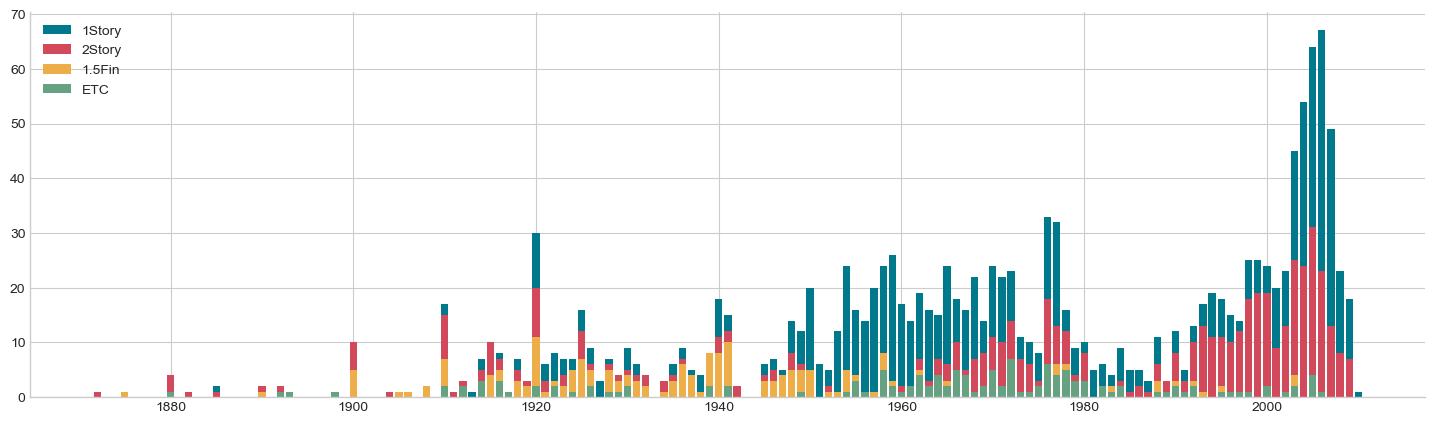

In [30]:
fig, ax = plt.subplots(figsize = (18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.bar(hs_built.index, hs_built, color = color[i], label = hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc = 'upper left')
ax.grid(True)
plt.show()
    


Bar > Multiple > Stacked > Ratio

In [31]:
data_sub = data.groupby("HouseStyle")["YearBuilt"].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].T
data_sub

HouseStyle,ETC,1.5Fin,2Story,1Story
YearBuilt,,,,
1872,0.0,0.0,1.0,0.0
1875,0.0,1.0,0.0,0.0
1880,1.0,0.0,3.0,0.0
1882,0.0,0.0,1.0,0.0
1885,0.0,0.0,1.0,1.0
...,...,...,...,...
2006,1.0,0.0,22.0,44.0
2007,0.0,0.0,13.0,36.0
2008,0.0,0.0,8.0,15.0


In [32]:
data_sum = data_sub.sum(axis=1)
data_sum

YearBuilt
1872     1.0
1875     1.0
1880     4.0
1882     1.0
1885     2.0
        ... 
2006    67.0
2007    49.0
2008    23.0
2009    18.0
2010     1.0
Length: 112, dtype: float64

In [34]:
data_sub = (data_sub.T / data_sum).cumsum().T
data_sub

HouseStyle,ETC,1.5Fin,2Story,1Story
YearBuilt,,,,
1872,0.000000,0.000000,1.000000,1.0
1875,0.000000,1.000000,1.000000,1.0
1880,0.250000,0.250000,1.000000,1.0
1882,0.000000,0.000000,1.000000,1.0
1885,0.000000,0.000000,0.500000,1.0
...,...,...,...,...
2006,0.014925,0.014925,0.343284,1.0
2007,0.000000,0.000000,0.265306,1.0
2008,0.000000,0.000000,0.347826,1.0


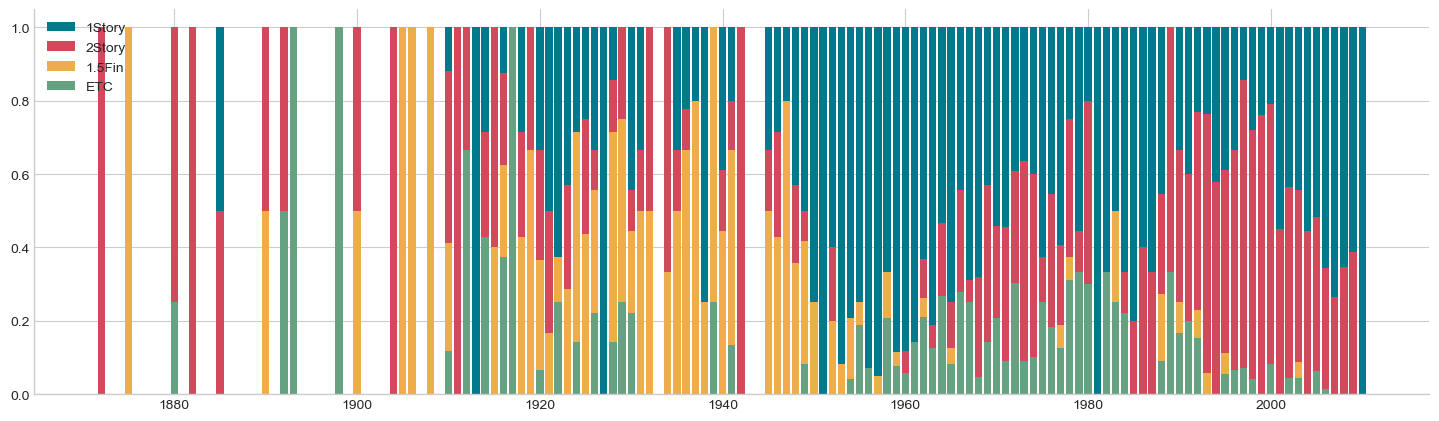

In [36]:
fig, ax = plt.subplots(figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.bar(hs_built.index, hs_built, color=color[i], label=hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.legend(loc='upper left')
ax.grid(True)
plt.show()

Bar > Multiple > Adjacent

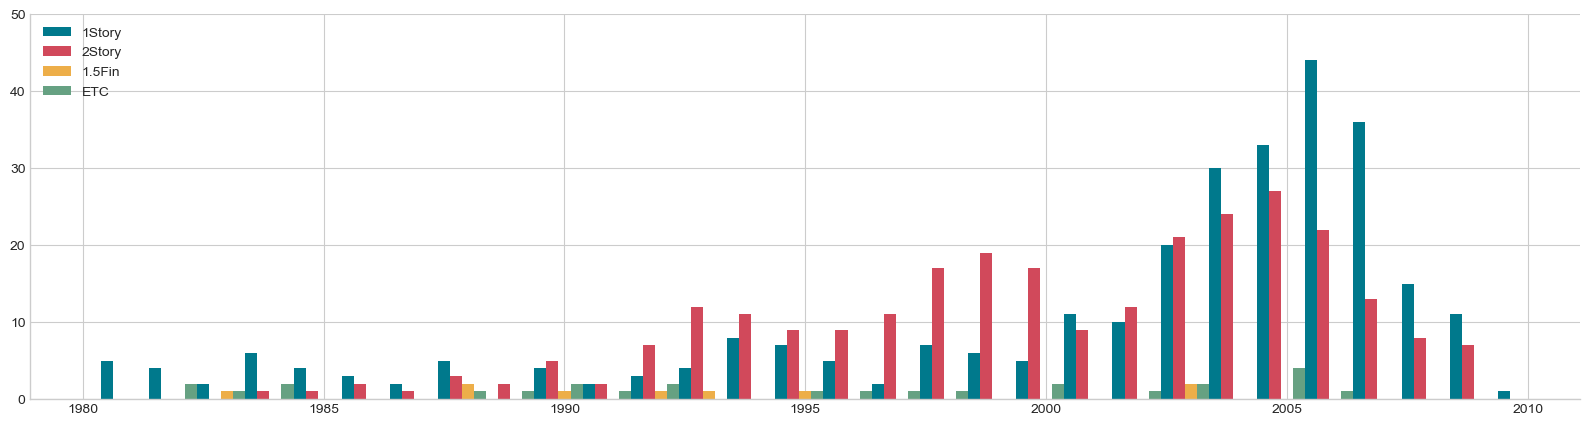

In [37]:
fig, ax, = plt.subplots(figsize = (20, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

width = 0.25

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[(data['HouseStyle']==hs)&(data['YearBuilt']>1980)]['YearBuilt'].value_counts()
    ax.bar(hs_built.index+(width*(i-2)), hs_built, width, color=color[i], label=hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
plt.show()

### 2. Line

Line > Single > Normal

In [38]:
built = data["YearBuilt"].value_counts().sort_index()
built.head()

1872    1
1875    1
1880    4
1882    1
1885    2
Name: YearBuilt, dtype: int64

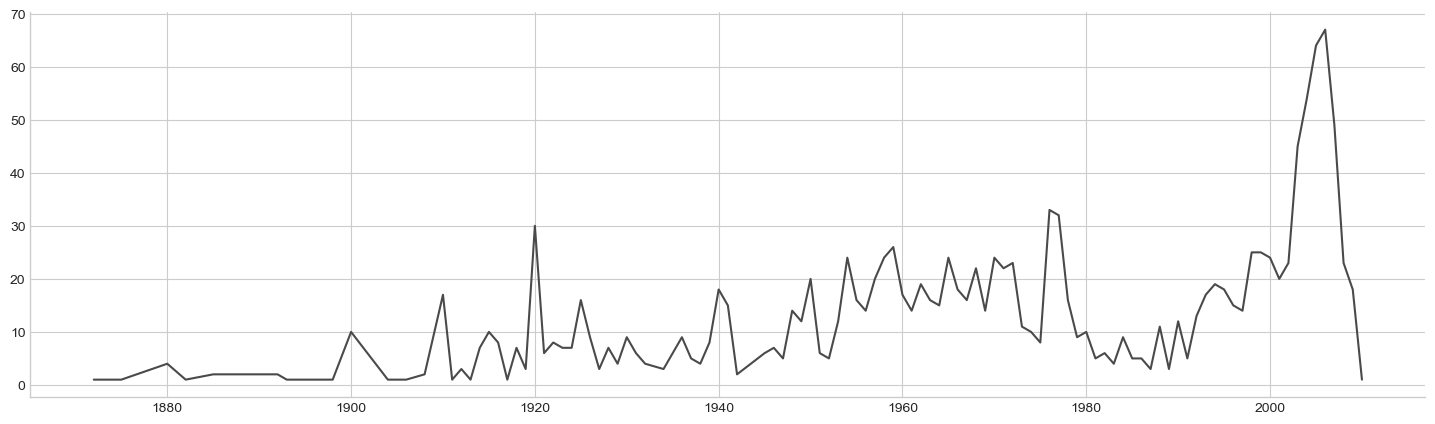

In [39]:
fig, ax = plt.subplots(figsize = (18, 5))

ax.plot(built.index, built, color='#4a4a4a')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(True)
plt.show()

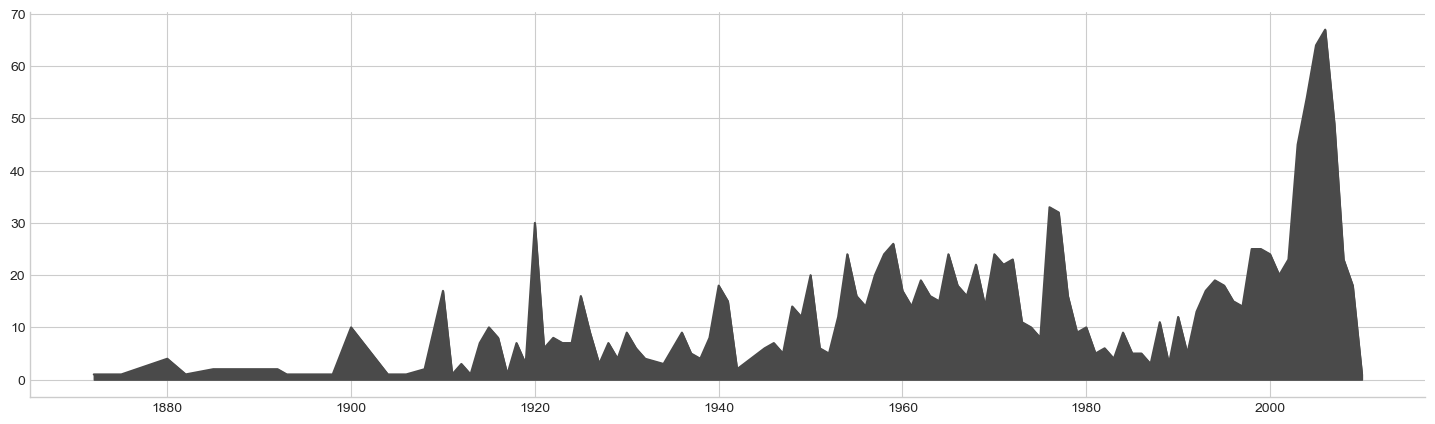

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ax.plot(built.index, built, color='#4a4a4a')

ax.fill_between(built.index, 0, built, color='#4a4a4a') # 

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(True)

plt.show()

Line > Single > Step

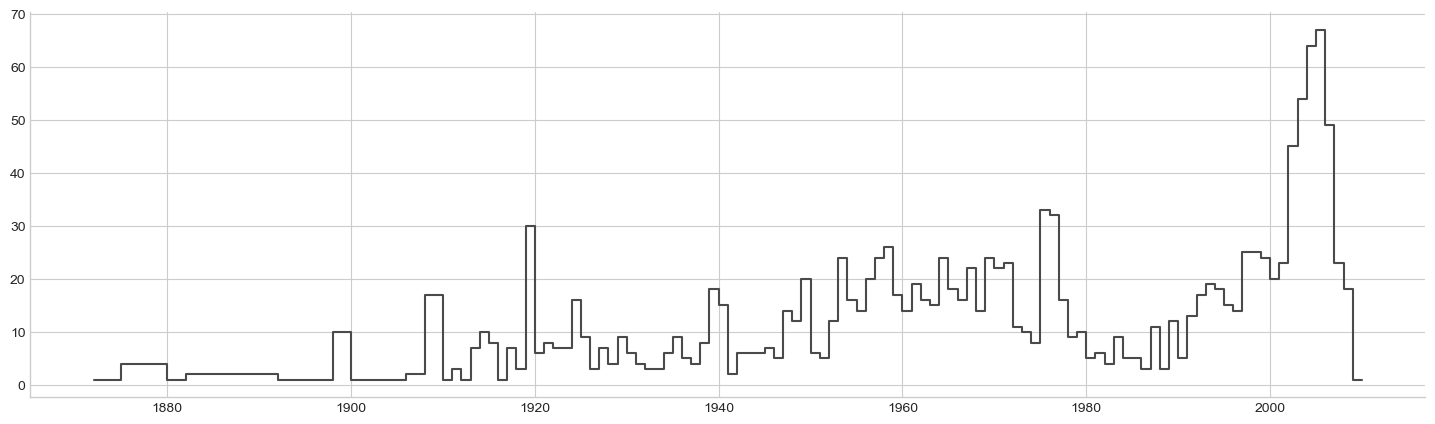

In [43]:
built = data['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ax.step(built.index, built, color='#4a4a4a')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(True)

plt.show()

Line > Single > Step Area

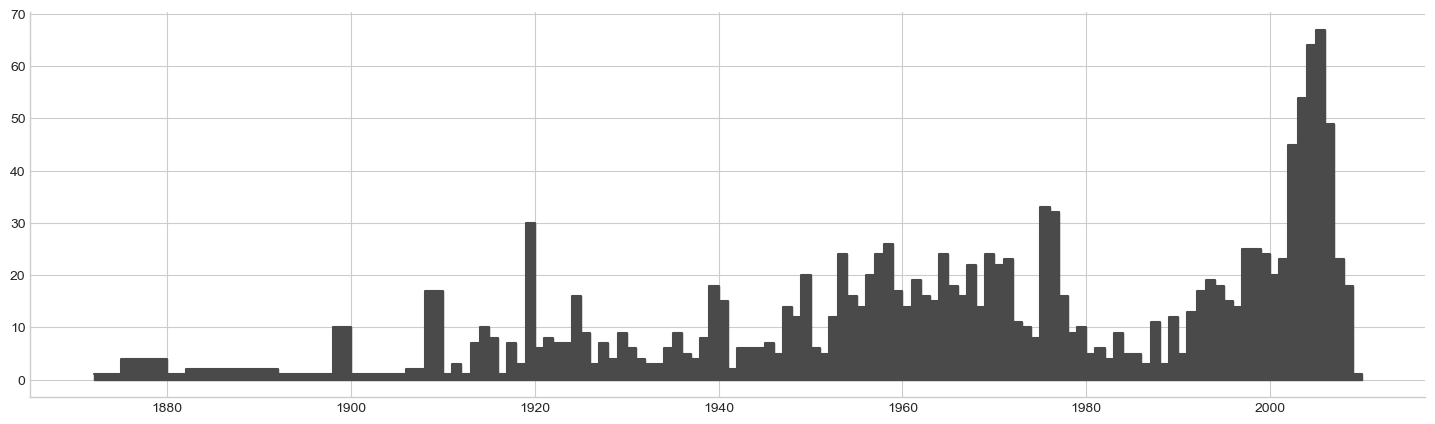

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ax.step(built.index, built, color='#4a4a4a')

ax.fill_between(built.index, 0, built, color='#4a4a4a', step='pre')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(True)

plt.show()

Line > Multiple > Subplots

In [45]:
data['HouseStyle']

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object

In [46]:
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
ETC       135
Name: HouseStyle, dtype: int64

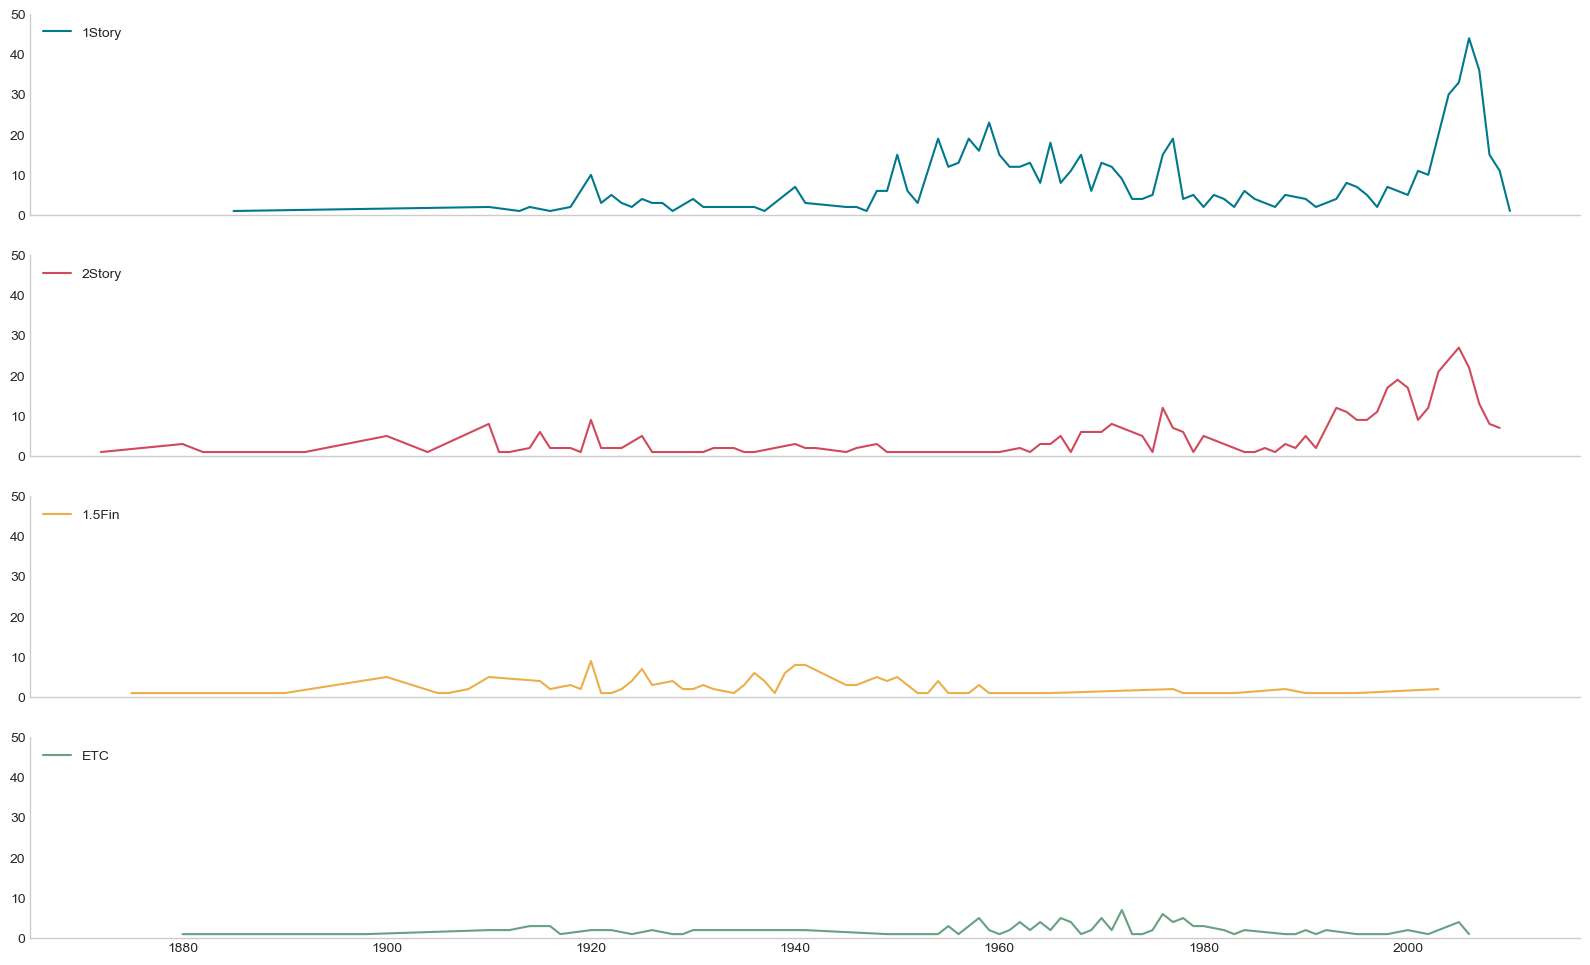

In [54]:
fig, ax = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
color = ["#00798c", "#d1495b", '#edae49', '#66a182']
plt.grid()
for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle'] == hs]['YearBuilt'].value_counts().sort_index()
    
    ax[i].plot(hs_built.index, hs_built, color = color[i], label = hs)
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc='upper left')
    for s in ['top', 'right']:
        ax[i].spines[s].set_visible(False)
    ax[i].grid(False)

#plt.grid(False)
plt.show()

Line > Multiple > Horizon Chart

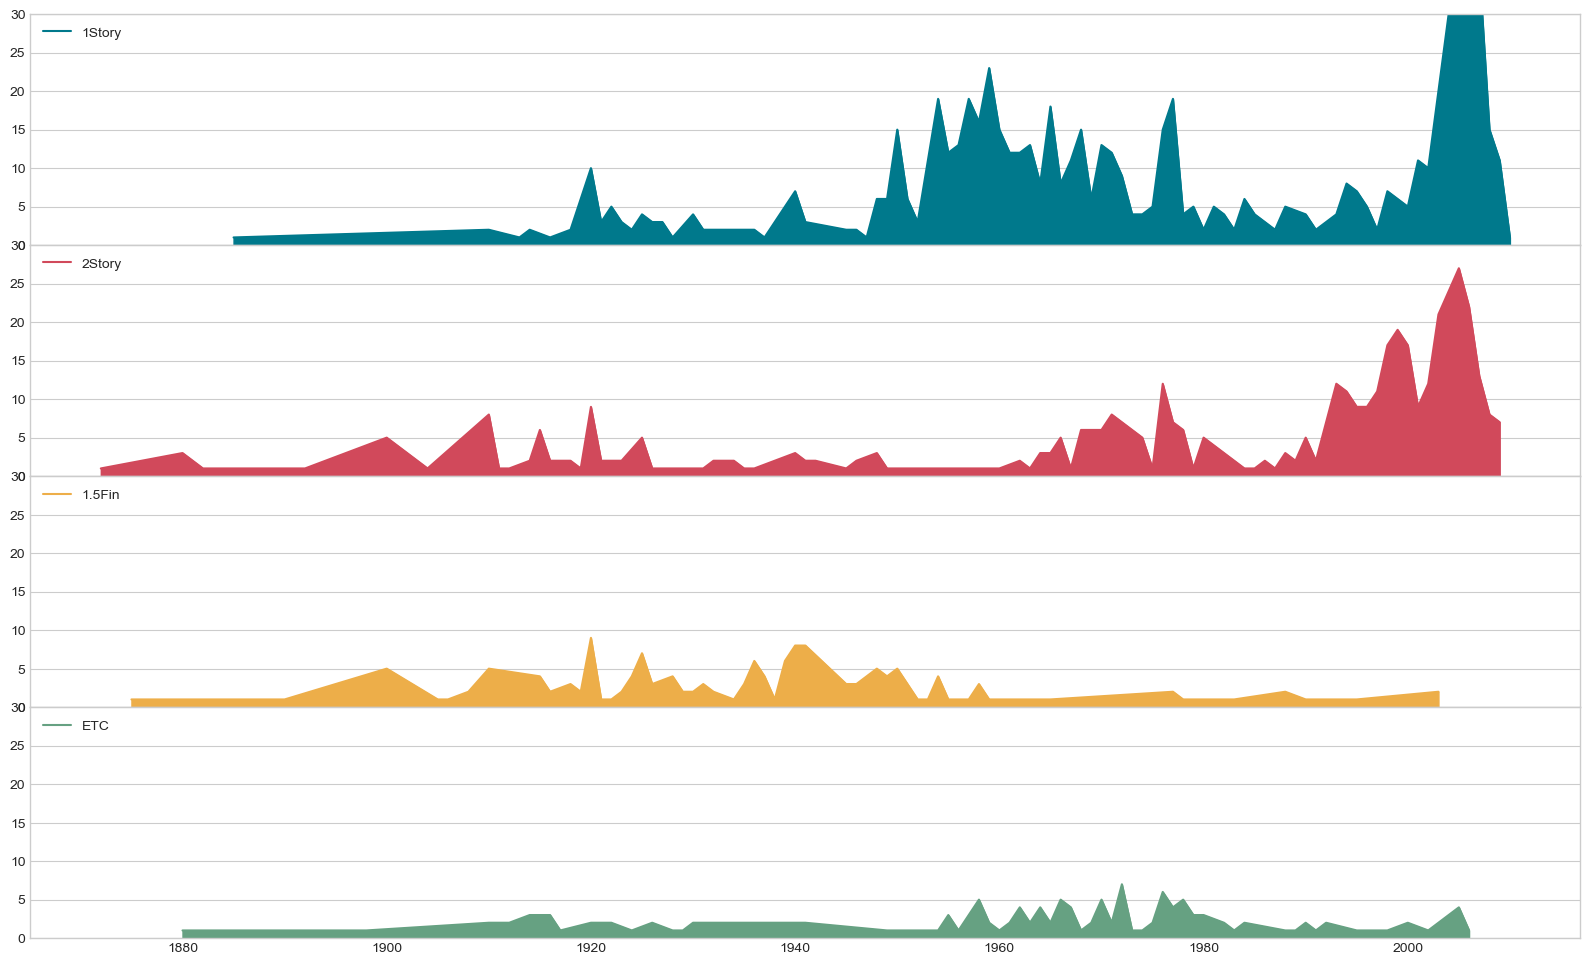

In [56]:
fig, ax = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax[i].plot(hs_built.index, hs_built, color=color[i], label=hs)
    ax[i].fill_between(hs_built.index, 0, hs_built, color=color[i])
    ax[i].set_ylim(0, 30)
    ax[i].legend(loc='upper left')
    ax[i].grid(False, axis = 'x')

plt.subplots_adjust(hspace=0)
plt.show()

Line > Multiple > Overlaped

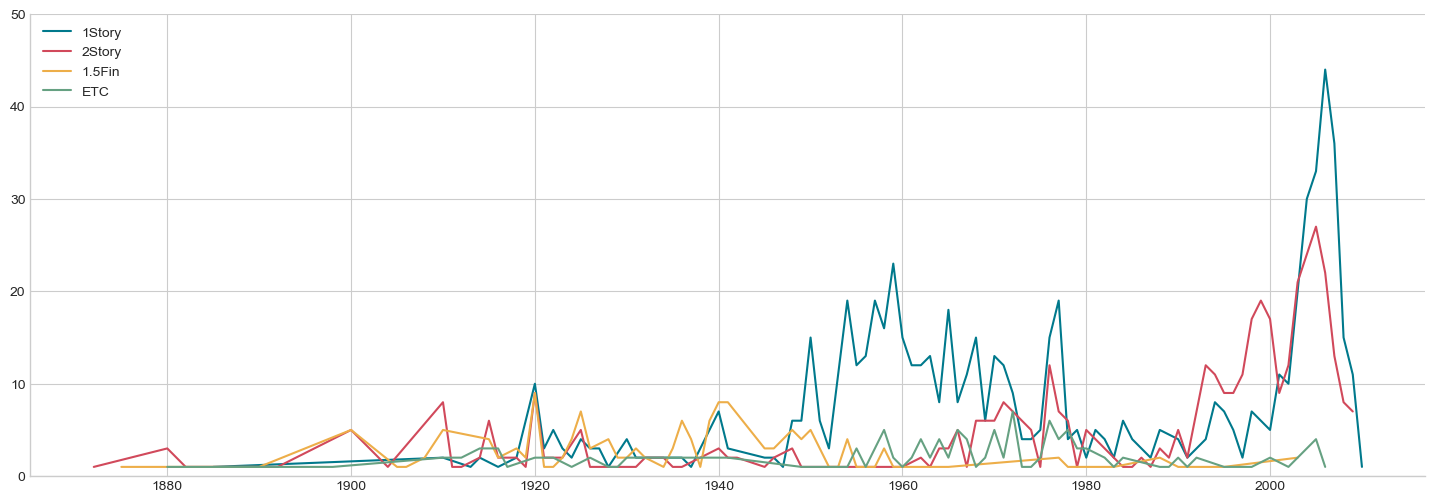

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(True)

plt.show()

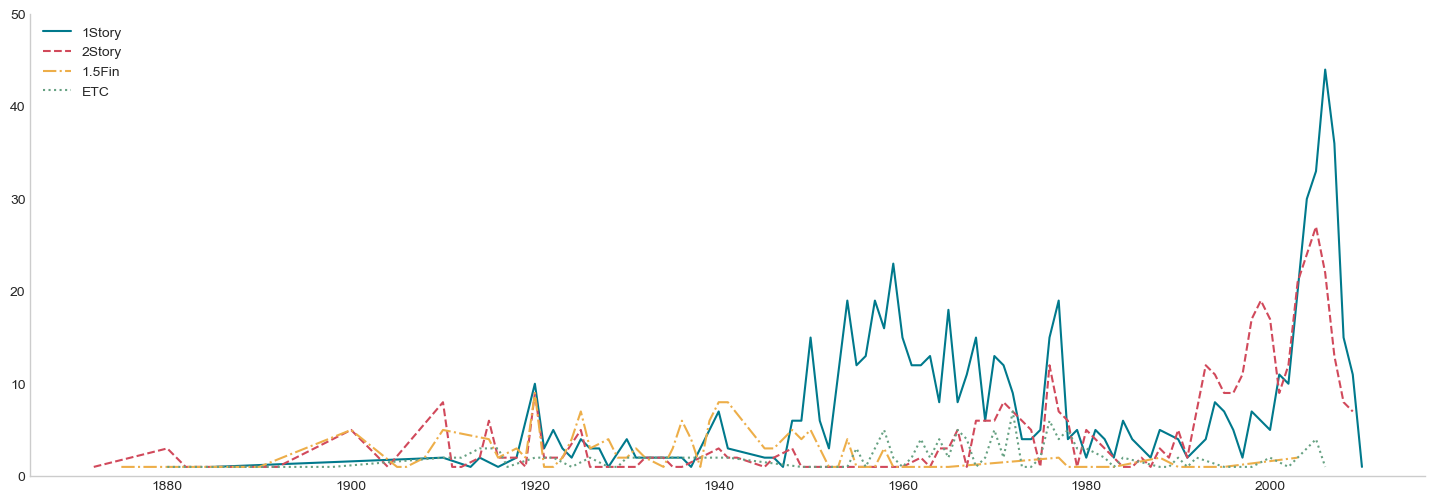

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']
linestyles = ['-', '--', '-.', ':']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], linestyle=linestyles[i], label=hs)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

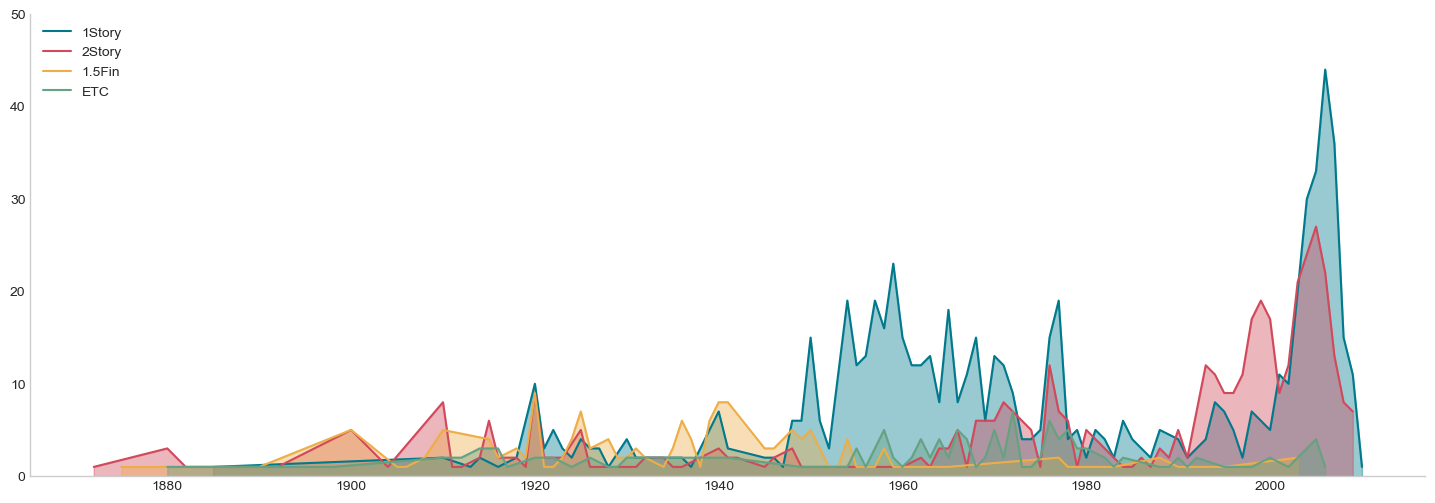

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

Line > Multiple > Stacked > Amout

In [61]:
dtadata_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum(axis=0).T

In [62]:
data_sub

HouseStyle,ETC,1.5Fin,2Story,1Story
YearBuilt,,,,
1872,0.000000,0.000000,1.000000,1.0
1875,0.000000,1.000000,1.000000,1.0
1880,0.250000,0.250000,1.000000,1.0
1882,0.000000,0.000000,1.000000,1.0
1885,0.000000,0.000000,0.500000,1.0
...,...,...,...,...
2006,0.014925,0.014925,0.343284,1.0
2007,0.000000,0.000000,0.265306,1.0
2008,0.000000,0.000000,0.347826,1.0


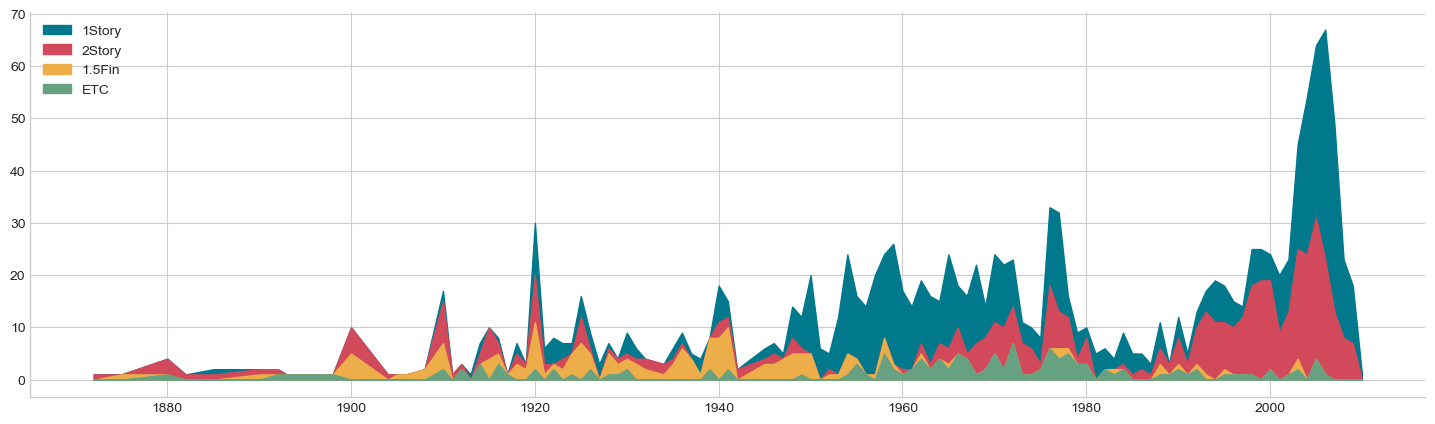

In [65]:
data_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.legend(loc='upper left')
ax.grid(True)
plt.show()

Line > Multiple > Stacked > Stream graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


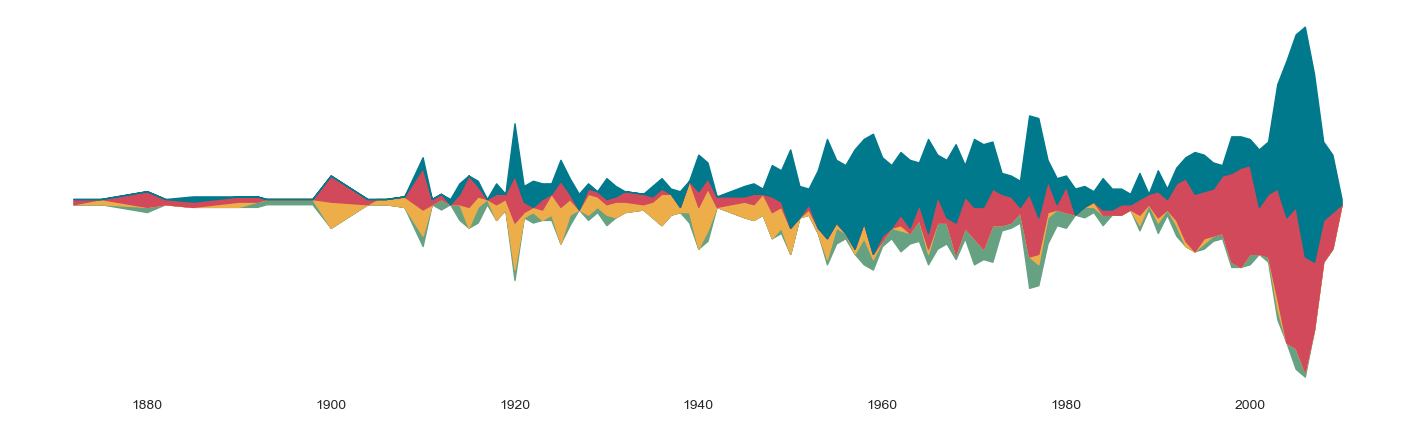

In [66]:
data_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum(axis=0).T
data_sub.insert(0, "base", np.zeros(len(data_sub)))


data_sub = data_sub.add(-data['YearBuilt'].value_counts()/2, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182'][::-1]
hs_list = data_sub.columns


for i, hs in enumerate(hs_list):
    if i == 0 : continue
    ax.fill_between(hs_built.index, data_sub.iloc[:,i-1], data_sub.iloc[:,i], color=color[i-1])
    
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

ax.set_yticks([])
ax.legend(loc='upper left')
ax.grid(axis='x')
plt.show()